In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
        
        
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('BostonHousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [7]:
df[df.isna()].head(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.dropna(inplace=True)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['MEDV'])
y = df['MEDV']
cols = X.columns

scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X,columns=cols)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Reset indices for both X_train and y_train
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

X_train: (315, 13)
y_train: (315,)
X_test: (79, 13)
y_test: (79,)


In [10]:
class NeuralNetwork:
    def __init__(self, input_neurons, hidden_neurons, output_neurons, learning_rate):
        self.weights_input_hidden = np.random.uniform(-0.5, 0.5, (hidden_neurons, input_neurons))
        self.weights_hidden_output = np.random.uniform(-0.5, 0.5, (output_neurons, hidden_neurons))
        self.learning_rate = learning_rate
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def forward(self, inputs):
        self.inputs = np.array(inputs, ndmin=2).T
        hidden_input = self.weights_input_hidden @ self.inputs
        self.hidden_output = self.sigmoid(hidden_input)
        final_input = self.weights_hidden_output @ self.hidden_output
        return final_input
    
    def backward(self, actual, pred):
        output_error = actual - pred.T
        hidden_grad = (self.weights_hidden_output.T @ output_error) * (self.hidden_output) * (1 - self.hidden_output)
        self.weights_hidden_output += self.learning_rate * output_error @ self.hidden_output.T
        self.weights_input_hidden += self.learning_rate * hidden_grad @ self.inputs.T
        
    def MSE(self,actual,pred):
        return (np.sum(actual-pred)**2) / len(actual)

In [11]:
nn = NeuralNetwork(X_train.shape[1],32,1,0.1)

In [12]:
epochs= 5000
losses = {'train':[],'test':[]}
for epoch in range(epochs):
    batch =np.random.choice(X_train.index,8, replace = False)
    for features,target in zip(X_train.loc[batch].values,y_train.loc[batch].values):
        pred = nn.forward(features)
        nn.backward(target, pred)
    losses['train'].append(nn.MSE(y_train,nn.forward(X_train)[0]))
    losses['test'].append(nn.MSE(y_test,nn.forward(X_test)[0]))

In [13]:
result = pd.DataFrame(
    {
        'Actual':y_test.values,
        'Prediction': nn.forward(X_test)[0]
    }
)

In [14]:
result['Resuidual'] = abs(result['Actual']-result['Prediction'])

In [15]:
result

,Actual,Prediction,Resuidual
0,23.0,15.331643,7.668357
1,28.0,21.989440,6.010560
2,12.8,13.870067,1.070067
3,23.8,21.033853,2.766147
4,5.0,9.534119,4.534119
...,...,...,...
74,28.5,34.554537,6.054537
75,39.8,33.449449,6.350551
76,22.2,18.853825,3.346175
77,26.6,28.628436,2.028436


In [16]:
MAE = result['Resuidual'].sum() / len(result)
MAE

5.168185485752661

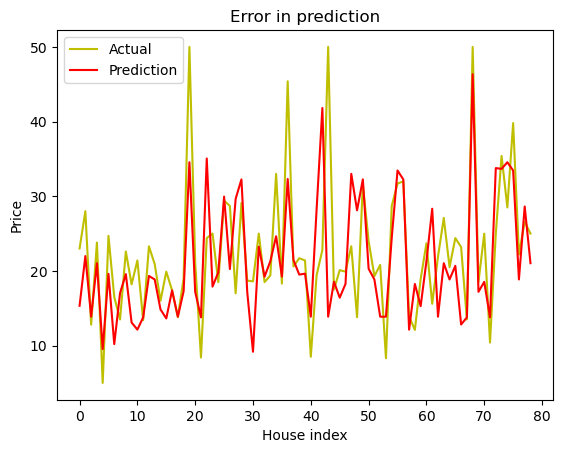

In [21]:
import matplotlib.pyplot as plt

plt.plot(result['Actual'], color='y', label='Actual')
plt.plot(result['Prediction'],color='r',label='Prediction')
plt.title('Error in prediction')
plt.xlabel('House index')
plt.ylabel('Price')
plt.legend()
plt.show()